In [1]:
import platform
import os
import numpy as np
import tensorflow as tf
gpu_token = tf.test.is_gpu_available('GPU')

if platform.machine() == 'x86_64': 
    if gpu_token:
        os.chdir('/home/ucdasec/Faulthunter-RNN-approach')
    else:
        os.chdir("/home/sakshmeno/Documents/GitHub/C-RNN-approach")
elif platform.machine() == 'arm64':
    os.chdir("/Users/saksh.menon/Documents/GitHub/C-RNN-approach")

from Utils.dataframe_gen import *
from Utils.vector_gen import *
# from Utils.w2b_encoding_lw_iter1 import *
from Utils.w2b_encoding_lw_iter2 import *
# from Utils.w2b_encoding_lw_iter3 import *
# from Utils.w2b_encoding_lw_iter4 import *
from Models.RNN_paper_prototype import *
from Utils.metrics_summary import *

2024-04-24 12:21:43.519519: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-24 12:21:43.519563: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-24 12:21:43.520588: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-24 12:21:43.526094: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-24 12:21:44.188558: W tensorflow/compiler/tf2

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2024-04-24 12:21:44.839201: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-24 12:21:44.874833: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-24 12:21:44.875050: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [2]:
original_df = dataframe_init(gpu_token)[0]
vectors = vec_split(original_df)
vectors = encoder2(vectors)
tensors = tensor_gen(vectors)

/home/ucdasec/Faulthunter-RNN-approach/Utils/w2b_encoding_lw_iter2.py:116: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  vectors[vector]['Encoded Lines'][row[0]] = [eval(i) for i in encodedline]#tuple(encodedline)
/home/ucdasec/Faulthunter-R

In [3]:
model = model_ver_5(tensors[0][0].shape[0])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
Total params: 22 (88.00 Byte)
Trainable params: 22 (88.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
history = model.fit(tensors[0], tensors[3], epochs=50, validation_data=(tensors[1],tensors[4]))
y_pred = model.predict(tensors[2])

Epoch 1/50


2024-04-24 12:22:02.546633: I external/local_xla/xla/service/service.cc:168] XLA service 0x5d628263ca70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-24 12:22:02.546656: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2024-04-24 12:22:02.551178: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-24 12:22:02.995914: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1713975723.066471  125034 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


90/90 [==============================] - 2s 3ms/step - loss: 0.6581 - accuracy: 0.9453 - val_loss: 0.5966 - val_accuracy: 0.9559
Epoch 2/50
90/90 [==============================] - 0s 2ms/step - loss: 0.5461 - accuracy: 0.9642 - val_loss: 0.4875 - val_accuracy: 0.9926
Epoch 3/50
90/90 [==============================] - 0s 2ms/step - loss: 0.4381 - accuracy: 0.9902 - val_loss: 0.3864 - val_accuracy: 0.9926
Epoch 4/50
90/90 [==============================] - 0s 2ms/step - loss: 0.3435 - accuracy: 0.9769 - val_loss: 0.3014 - val_accuracy: 0.9755
Epoch 5/50
90/90 [==============================] - 0s 2ms/step - loss: 0.2675 - accuracy: 0.9762 - val_loss: 0.2352 - val_accuracy: 0.9755
Epoch 6/50
90/90 [==============================] - 0s 2ms/step - loss: 0.2094 - accuracy: 0.9762 - val_loss: 0.1850 - val_accuracy: 0.9755
Epoch 7/50
90/90 [==============================] - 0s 2ms/step - loss: 0.1662 - accuracy: 0.9762 - val_loss: 0.1481 - val_accuracy: 0.9755
Epoch 8/50
90/90 [=============

In [5]:
y_pred[:100]

array([[0.9967656 , 0.00323434],
       [0.9967656 , 0.00323434],
       [0.9967656 , 0.00323434],
       [0.9967656 , 0.00323434],
       [0.9967656 , 0.00323434],
       [0.9967656 , 0.00323434],
       [0.9967656 , 0.00323434],
       [0.9967656 , 0.00323434],
       [0.9967656 , 0.00323434],
       [0.9967656 , 0.00323434],
       [0.9967656 , 0.00323434],
       [0.9967656 , 0.00323434],
       [0.9967656 , 0.00323434],
       [0.9967656 , 0.00323434],
       [0.9967656 , 0.00323434],
       [0.9967656 , 0.00323434],
       [0.9967656 , 0.00323434],
       [0.9967656 , 0.00323434],
       [0.9967656 , 0.00323434],
       [0.9967656 , 0.00323434],
       [0.9967656 , 0.00323434],
       [0.9967656 , 0.00323434],
       [0.9967656 , 0.00323434],
       [0.9967656 , 0.00323434],
       [0.9967656 , 0.00323434],
       [0.21729407, 0.78270596],
       [0.9967656 , 0.00323434],
       [0.9967656 , 0.00323434],
       [0.9967656 , 0.00323434],
       [0.9967656 , 0.00323434],
       [0.

In [6]:
classify = lambda x : int(x[0]<x[1])
classified_outputs = list(map(classify, y_pred))
classified_labels = list(map(classify, tensors[5]))

In [7]:
score_summary(classified_labels, classified_outputs, 0)
true_positives, true_negetives, false_positives, false_negetives = true_false_computation(classified_labels, classified_outputs, 0)
print('true_positives: {}\ntrue_negetives: {}\nfalse_positives: {}\nfalse_negetives: {}\n'.format(true_positives, true_negetives, false_positives, false_negetives))
print('#########################################\n')
score_summary(classified_labels, classified_outputs, 1)
true_positives, true_negetives, false_positives, false_negetives = true_false_computation(classified_labels, classified_outputs, 1)
print('true_positives: {}\ntrue_negetives: {}\nfalse_positives: {}\nfalse_negetives: {}\n'.format(true_positives, true_negetives, false_positives, false_negetives))

For secure:
f1 score:  0.9949748743718593
precision score:  0.9949748743718593
recall score:  0.9949748743718593

true_positives: 792
true_negetives: 16
false_positives: 4
false_negetives: 4

#########################################

For insecure:
f1 score:  0.8
precision score:  0.8
recall score:  0.8

true_positives: 16
true_negetives: 792
false_positives: 4
false_negetives: 4



In [9]:
model.predict([[1,1]])

1/1 [==============================] - 0s 23ms/step


array([[0.21729407, 0.78270596]], dtype=float32)

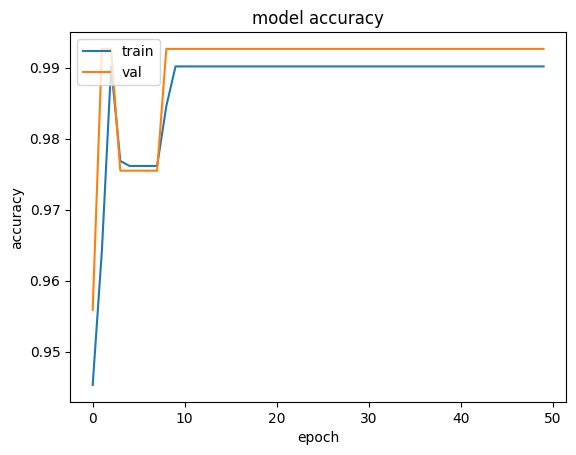

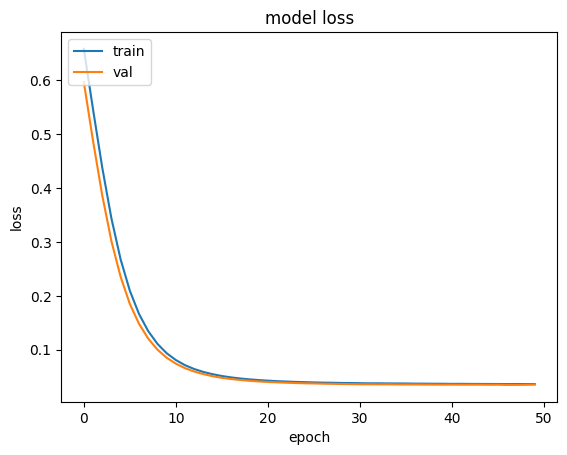

In [10]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [4]:
!nvidia-smi

Tue Apr 16 16:22:14 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:02:00.0 Off |                  N/A |
| 27%   34C    P8     5W / 151W |     16MiB /  8192MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [12]:
!kill 6281

In [1]:
!git stash
!git pull

Saved working directory and index state WIP on dev: 4b8a987 force encode
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 7 (delta 5), reused 7 (delta 5), pack-reused 0
Unpacking objects: 100% (7/7), 55.20 KiB | 1.10 MiB/s, done.
From https://github.com/sakshmenon/Faulthunter-RNN-approach
   4b8a987..b1897bf  dev        -> origin/dev
Updating 4b8a987..b1897bf
Fast-forward
 Scripts/tester.ipynb           | 11767 ++++++++++++++++++++++++++++++++++++++-
 Utils/vector_gen.py            |     2 +-
 Utils/w2b_encoding_lw_iter2.py |     6 +-
 3 files changed, 11477 insertions(+), 298 deletions(-)
